##Imports

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import nltk


nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

##Load Dataset

In [18]:
train_df = pd.read_csv('/content/SMS_train.csv', encoding='cp1252')
test_df = pd.read_csv('/content/SMS_test.csv', encoding='cp1252')

##Step 1: Display the training and testing datasets

In [19]:
print("\nStep 1: Load the training and testing datasets")
print("Training Data (first 5 rows):\n", train_df.head())
print("Testing Data (first 5 rows):\n", test_df.head())


Step 1: Load the training and testing datasets
Training Data (first 5 rows):
    S. No.                                       Message_body     Label
0       1                         Rofl. Its true to its name  Non-Spam
1       2  The guy did some bitching but I acted like i'd...  Non-Spam
2       3  Pity, * was in mood for that. So...any other s...  Non-Spam
3       4               Will ü b going to esplanade fr home?  Non-Spam
4       5  This is the 2nd time we have tried 2 contact u...      Spam
Testing Data (first 5 rows):
    S. No.                                       Message_body Label
0       1  UpgrdCentre Orange customer, you may now claim...  Spam
1       2  Loan for any purpose £500 - £75,000. Homeowner...  Spam
2       3  Congrats! Nokia 3650 video camera phone is you...  Spam
3       4  URGENT! Your Mobile number has been awarded wi...  Spam
4       5  Someone has contacted our dating service and e...  Spam


##Step 2: Check for missing values and remove them

In [20]:
print("\nStep 2: Check for missing values and remove them")
print("Number of rows before removing missing values in training set:", len(train_df))
train_df = train_df.dropna()
print("Number of rows after removing missing values in training set:", len(train_df))

print("Number of rows before removing missing values in testing set:", len(test_df))
test_df = test_df.dropna()
print("Number of rows after removing missing values in testing set:", len(test_df))


Step 2: Check for missing values and remove them
Number of rows before removing missing values in training set: 957
Number of rows after removing missing values in training set: 957
Number of rows before removing missing values in testing set: 125
Number of rows after removing missing values in testing set: 125


## Display processed data

In [21]:
print("\nProcessed Training Data (first 5 rows):\n", train_df.head())
print("\nProcessed Testing Data (first 5 rows):\n", test_df.head())


Processed Training Data (first 5 rows):
    S. No.                                       Message_body     Label
0       1                         Rofl. Its true to its name  Non-Spam
1       2  The guy did some bitching but I acted like i'd...  Non-Spam
2       3  Pity, * was in mood for that. So...any other s...  Non-Spam
3       4               Will ü b going to esplanade fr home?  Non-Spam
4       5  This is the 2nd time we have tried 2 contact u...      Spam

Processed Testing Data (first 5 rows):
    S. No.                                       Message_body Label
0       1  UpgrdCentre Orange customer, you may now claim...  Spam
1       2  Loan for any purpose £500 - £75,000. Homeowner...  Spam
2       3  Congrats! Nokia 3650 video camera phone is you...  Spam
3       4  URGENT! Your Mobile number has been awarded wi...  Spam
4       5  Someone has contacted our dating service and e...  Spam


##Step 3: Convert all text to lowercase

In [22]:
print("\nStep 3: Convert all text to lowercase")
train_df['Message_body'] = train_df['Message_body'].apply(lambda x: x.lower())
test_df['Message_body'] = test_df['Message_body'].apply(lambda x: x.lower())
print("Training Data after lowercase conversion (first 5 rows):\n", train_df.head())
print("Testing Data after lowercase conversion (first 5 rows):\n", test_df.head())


Step 3: Convert all text to lowercase
Training Data after lowercase conversion (first 5 rows):
    S. No.                                       Message_body     Label
0       1                         rofl. its true to its name  Non-Spam
1       2  the guy did some bitching but i acted like i'd...  Non-Spam
2       3  pity, * was in mood for that. so...any other s...  Non-Spam
3       4               will ü b going to esplanade fr home?  Non-Spam
4       5  this is the 2nd time we have tried 2 contact u...      Spam
Testing Data after lowercase conversion (first 5 rows):
    S. No.                                       Message_body Label
0       1  upgrdcentre orange customer, you may now claim...  Spam
1       2  loan for any purpose £500 - £75,000. homeowner...  Spam
2       3  congrats! nokia 3650 video camera phone is you...  Spam
3       4  urgent! your mobile number has been awarded wi...  Spam
4       5  someone has contacted our dating service and e...  Spam


##Step 4: Remove stop words

In [23]:
print("\nStep 4: Remove stop words")
stop_words = set(stopwords.words('english'))
train_df['Message_body'] = train_df['Message_body'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
test_df['Message_body'] = test_df['Message_body'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
print("Training Data after removing stop words (first 5 rows):\n", train_df.head())
print("Testing Data after removing stop words (first 5 rows):\n", test_df.head())


Step 4: Remove stop words
Training Data after removing stop words (first 5 rows):
    S. No.                                       Message_body     Label
0       1                                    rofl. true name  Non-Spam
1       2  guy bitching acted like i'd interested buying ...  Non-Spam
2       3           pity, * mood that. so...any suggestions?  Non-Spam
3       4                       ü b going esplanade fr home?  Non-Spam
4       5  2nd time tried 2 contact u. u £750 pound prize...      Spam
Testing Data after removing stop words (first 5 rows):
    S. No.                                       Message_body Label
0       1  upgrdcentre orange customer, may claim free ca...  Spam
1       2  loan purpose £500 - £75,000. homeowners + tena...  Spam
2       3  congrats! nokia 3650 video camera phone call 0...  Spam
3       4  urgent! mobile number awarded £2000 prize guar...  Spam
4       5  someone contacted dating service entered phone...  Spam


##Step 5: Remove punctuation

In [24]:
print("\nStep 5: Remove punctuation")
train_df['Message_body'] = train_df['Message_body'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
test_df['Message_body'] = test_df['Message_body'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
print("Training Data after removing punctuation (first 5 rows):\n", train_df.head())
print("Testing Data after removing punctuation (first 5 rows):\n", test_df.head())


Step 5: Remove punctuation
Training Data after removing punctuation (first 5 rows):
    S. No.                                       Message_body     Label
0       1                                     rofl true name  Non-Spam
1       2  guy bitching acted like id interested buying s...  Non-Spam
2       3                  pity  mood that soany suggestions  Non-Spam
3       4                        ü b going esplanade fr home  Non-Spam
4       5  2nd time tried 2 contact u u £750 pound prize ...      Spam
Testing Data after removing punctuation (first 5 rows):
    S. No.                                       Message_body Label
0       1  upgrdcentre orange customer may claim free cam...  Spam
1       2  loan purpose £500  £75000 homeowners  tenants ...  Spam
2       3  congrats nokia 3650 video camera phone call 09...  Spam
3       4  urgent mobile number awarded £2000 prize guara...  Spam
4       5  someone contacted dating service entered phone...  Spam


##Step 6: Perform stemming

In [25]:
print("\nStep 6: Perform stemming")
ps = PorterStemmer()
train_df['Message_body'] = train_df['Message_body'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
test_df['Message_body'] = test_df['Message_body'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
print("Training Data after stemming (first 5 rows):\n", train_df.head())
print("Testing Data after stemming (first 5 rows):\n", test_df.head())


Step 6: Perform stemming
Training Data after stemming (first 5 rows):
    S. No.                                       Message_body     Label
0       1                                     rofl true name  Non-Spam
1       2  guy bitch act like id interest buy someth els ...  Non-Spam
2       3                       piti mood that soani suggest  Non-Spam
3       4                            ü b go esplanad fr home  Non-Spam
4       5  2nd time tri 2 contact u u £750 pound prize 2 ...      Spam
Testing Data after stemming (first 5 rows):
    S. No.                                       Message_body Label
0       1  upgrdcentr orang custom may claim free camera ...  Spam
1       2  loan purpos £500 £75000 homeown tenant welcom ...  Spam
2       3  congrat nokia 3650 video camera phone call 090...  Spam
3       4  urgent mobil number award £2000 prize guarante...  Spam
4       5  someon contact date servic enter phone fanci y...  Spam


##Display processed data

In [26]:
print("\nProcessed Training Data (first 5 rows):\n", train_df.head())
print("\nProcessed Testing Data (first 5 rows):\n", test_df.head())


Processed Training Data (first 5 rows):
    S. No.                                       Message_body     Label
0       1                                     rofl true name  Non-Spam
1       2  guy bitch act like id interest buy someth els ...  Non-Spam
2       3                       piti mood that soani suggest  Non-Spam
3       4                            ü b go esplanad fr home  Non-Spam
4       5  2nd time tri 2 contact u u £750 pound prize 2 ...      Spam

Processed Testing Data (first 5 rows):
    S. No.                                       Message_body Label
0       1  upgrdcentr orang custom may claim free camera ...  Spam
1       2  loan purpos £500 £75000 homeown tenant welcom ...  Spam
2       3  congrat nokia 3650 video camera phone call 090...  Spam
3       4  urgent mobil number award £2000 prize guarante...  Spam
4       5  someon contact date servic enter phone fanci y...  Spam


## Task 2: Data Visualization

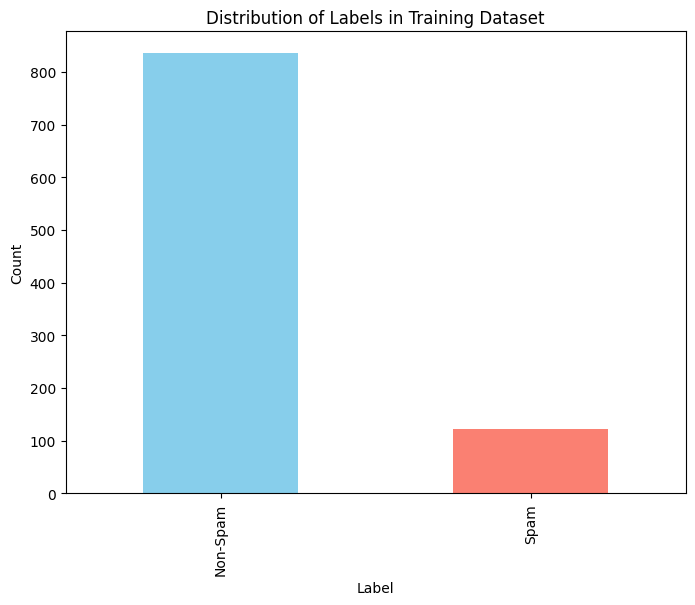

In [27]:
import matplotlib.pyplot as plt

# Visualize the distribution of labels in the training set
plt.figure(figsize=(8, 6))
train_df['Label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Labels in Training Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

## Task 3: Feature **Engineering**

## Bag of Words representation

In [33]:
count_vectorizer = CountVectorizer(binary= True)
X_train_bow = count_vectorizer.fit_transform(train_df['Message_body'])
X_test_bow = count_vectorizer.transform(test_df['Message_body'])
print("Our vocabulary: ", count_vectorizer.vocabulary_)

Our vocabulary:  {'rofl': 2089, 'true': 2541, 'name': 1682, 'guy': 1151, 'bitch': 467, 'act': 279, 'like': 1468, 'id': 1269, 'interest': 1315, 'buy': 541, 'someth': 2268, 'els': 889, 'next': 1706, 'week': 2679, 'gave': 1079, 'us': 2598, 'free': 1037, 'piti': 1883, 'mood': 1640, 'that': 2441, 'soani': 2257, 'suggest': 2369, 'go': 1105, 'esplanad': 915, 'fr': 1034, 'home': 1235, '2nd': 148, 'time': 2480, 'tri': 2537, 'contact': 688, '750': 222, 'pound': 1923, 'prize': 1958, 'claim': 639, 'easi': 873, 'call': 549, '087187272008': 44, 'now1': 1745, '10p': 80, 'per': 1855, 'minut': 1610, 'btnationalr': 527, 'remind': 2047, 'o2': 1758, 'get': 1093, '250': 128, 'credit': 721, 'detail': 785, 'great': 1136, 'offer': 1766, 'pl': 1886, 'repli': 2057, 'text': 2435, 'valid': 2607, 'hous': 1246, 'postcod': 1922, 'huh': 1256, 'lei': 1454, 'wait': 2645, 'til': 2478, 'least': 1446, 'wednesday': 2677, 'see': 2146, 'ard': 361, 'dat': 749, 'lor': 1504, 'ok': 1772, 'soni': 2273, 'ericsson': 909, 'salesman'

## TF-IDF representation

In [38]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['Message_body'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['Message_body'])
print(tfidf_vectorizer.idf_) #IDF for all words in the vocabulary
print(tfidf_vectorizer.get_feature_names_out()) #All words in the vocabulary.


[7.1717006  7.1717006  7.1717006  ... 7.1717006  6.76623549 7.1717006 ]
['0121' '02070836089' '02073162414' ... 'zebra' 'zed' 'zero']


## Display Bag of Words and TF-IDF representations

In [39]:
print("\nBag of Words representation (first 5 rows):\n", pd.DataFrame(X_train_bow.toarray(), columns=count_vectorizer.get_feature_names_out()).head())
print("\nTF-IDF representation (first 5 rows):\n", pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out()).head())


Bag of Words representation (first 5 rows):
    0121  02070836089  02073162414  020903  060505  061104  07099833605  \
0     0            0            0       0       0       0            0   
1     0            0            0       0       0       0            0   
2     0            0            0       0       0       0            0   
3     0            0            0       0       0       0            0   
4     0            0            0       0       0       0            0   

   0776xxxxxxx  078  07808247860  ...  younger  your  yovil  yr  yummi  yuo  \
0            0    0            0  ...        0     0      0   0      0    0   
1            0    0            0  ...        0     0      0   0      0    0   
2            0    0            0  ...        0     0      0   0      0    0   
3            0    0            0  ...        0     0      0   0      0    0   
4            0    0            0  ...        0     0      0   0      0    0   

   yup  zebra  zed  zero  
0    0 

# Task 4: Model Training


# Train SVM model after applying Bag of words

In [40]:
svm_bow_model = SVC()
svm_bow_model.fit(X_train_bow, train_df['Label'])

SVC()

# Train SVM model after applying TF-IDF


In [41]:
svm_tfidf_model = SVC()
svm_tfidf_model.fit(X_train_tfidf, train_df['Label'])

SVC()

# Train Random Forest model after applying Bag of words


In [42]:
rf_bow_model = RandomForestClassifier()
rf_bow_model.fit(X_train_bow, train_df['Label'])

RandomForestClassifier()

# Train Random Forest model after applying TF-IDF


In [43]:
rf_tfidf_model = RandomForestClassifier()
rf_tfidf_model.fit(X_train_tfidf, train_df['Label'])

RandomForestClassifier()

# Evaluate performance on the testing dataset


In [44]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Spam')
    recall = recall_score(y_test, y_pred, pos_label='Spam')
    return accuracy, precision, recall

# Evaluate SVM models on the testing set


In [47]:
accuracy_svm_bow, precision_svm_bow, recall_svm_bow = evaluate_model(svm_bow_model, X_test_bow, test_df['Label'])
accuracy_svm_tfidf, precision_svm_tfidf, recall_svm_tfidf = evaluate_model(svm_tfidf_model, X_test_tfidf, test_df['Label'])
print("\nSVM Bag of Words - Accuracy: {}, Precision: {}, Recall: {}".format(accuracy_svm_bow, precision_svm_bow, recall_svm_bow))
print("SVM TF-IDF - Accuracy: {}, Precision: {}, Recall: {}".format(accuracy_svm_tfidf, precision_svm_tfidf, recall_svm_tfidf))


SVM Bag of Words - Accuracy: 0.728, Precision: 1.0, Recall: 0.5526315789473685
SVM TF-IDF - Accuracy: 0.728, Precision: 1.0, Recall: 0.5526315789473685


# Evaluate Random Forest models on the testing set


In [48]:
accuracy_rf_bow, precision_rf_bow, recall_rf_bow = evaluate_model(rf_bow_model, X_test_bow, test_df['Label'])
accuracy_rf_tfidf, precision_rf_tfidf, recall_rf_tfidf = evaluate_model(rf_tfidf_model, X_test_tfidf, test_df['Label'])
print("Random Forest Bag of Words - Accuracy: {}, Precision: {}, Recall: {}".format(accuracy_rf_bow, precision_rf_bow, recall_rf_bow))
print("Random Forest TF-IDF - Accuracy: {}, Precision: {}, Recall: {}".format(accuracy_rf_tfidf, precision_rf_tfidf, recall_rf_tfidf))

Random Forest Bag of Words - Accuracy: 0.728, Precision: 1.0, Recall: 0.5526315789473685
Random Forest TF-IDF - Accuracy: 0.744, Precision: 1.0, Recall: 0.5789473684210527
